## Chapter 1.1
Notebook on comparison between canonic corpus and periodicals.

In [1]:
library(tidyverse)
library(tidytext)

library(ggrepel)
library(wesanderson)

theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Load RNC data

In [2]:
load("../../data/nkrja_19th_lem.Rda")
glimpse(c19)

Rows: 15,569
Columns: 41
$ Unnamed..0          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ path                <chr> "xix/1790-1810_poets/poets-001", "xix/1790-1810_po…
$ author              <chr> "С. С. Бобров", "С. С. Бобров", "С. С. Бобров", "С…
$ dub                 <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ original            <chr> "", "", "Гораций", "", "", "", "", "", "", "", "",…
$ language            <chr> "", "", "латинский", "", "", "", "", "", "", "", "…
$ header              <chr> "Царство всеобщей любви : «Еще вкруг солнцев не вр…
$ cyclus              <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ liber               <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ created             <chr> "1785", "1785", "1787", "1789", "1789", "1789", "1…
$ start               <dbl> 1785, 1785, 1787, 1789, 1789, 1789, 1792, 1800, 18…
$ end                 <dbl> NA, NA, NA, NA, NA, NA, 1800, NA, NA, 1803, 1803, …
$ exact        

Create 1830-1840 and 1835-1840 sets

In [3]:
nkrja_1835 <- c19 %>% filter(year > 1834 & year < 1841)
nkrja_1830 <- c19 %>% filter(year > 1829 & year < 1841)

### General NKRJA overview

Create a function for displaying stats

In [6]:
stats_nkrja <- function(corpus) {
    print("Number of unique authors:")
    print(length(unique(corpus$author)))

    print("Number of poems:")
    print(nrow(corpus))

    print("Top authors:")
    corpus %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(corpus) * 100) %>% 
        head(20) %>% print
    
    print("Sources:")
    
    corpus %>% 
        group_by(source) %>% 
        count(sort = T) %>% 
        mutate(perc = n/nrow(corpus)*100)
    }

#### 1835-1840

In [7]:
stats_nkrja(nkrja_1835)

[1] "Number of unique authors:"
[1] 60
[1] "Number of poems:"
[1] 1212
[1] "Top authors:"
# A tibble: 20 × 3
# Groups:   author [20]
   author                n  perc
   <chr>             <int> <dbl>
 1 В. Г. Бенедиктов    159 13.1 
 2 М. Ю. Лермонтов      82  6.77
 3 А. В. Кольцов        74  6.11
 4 А. С. Пушкин         60  4.95
 5 Н. А. Некрасов       59  4.87
 6 А. А. Фет            53  4.37
 7 В. А. Жуковский      47  3.88
 8 Е. П. Ростопчина     43  3.55
 9 И. П. Мятлев         43  3.55
10 А. Н. Майков         42  3.47
11 П. П. Ершов          40  3.30
12 Ф. И. Тютчев         37  3.05
13 А. И. Полежаев       36  2.97
14 Н. М. Языков         33  2.72
15 Н. П. Огарев         33  2.72
16 Н. В. Кукольник      25  2.06
17 В. И. Соколовский    21  1.73
18 Н. М. Сатин          21  1.73
19 А. К. Толстой        17  1.40
20 Д. В. Давыдов        17  1.40
[1] "Sources:"


source,n,perc
<chr>,<int>,<dbl>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",166,13.69636964
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",159,13.11881188
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",82,6.76567657
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",74,6.10561056
"Н. А. Некрасов. Полное собрание стихотворений: В 3 тт. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1967",59,4.86798680
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",58,4.78547855
"А. А. Фет. Стихотворения и поэмы. Библиотека поэта. Большая серия. Третье издание. -- Л.: Советский писатель, 1986",53,4.37293729
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",47,3.87788779
"Евдокия Ростопчина. Стихотворения Проза Письма. -- М., Сов. Россия, 1986",43,3.54785479


#### 1830-1840

In [8]:
stats_nkrja(nkrja_1830)

[1] "Number of unique authors:"
[1] 82
[1] "Number of poems:"
[1] 2409
[1] "Top authors:"
# A tibble: 20 × 3
# Groups:   author [20]
   author                n  perc
   <chr>             <int> <dbl>
 1 М. Ю. Лермонтов     357 14.8 
 2 А. С. Пушкин        194  8.05
 3 В. Г. Бенедиктов    165  6.85
 4 В. А. Жуковский     116  4.82
 5 А. В. Кольцов       113  4.69
 6 Н. М. Языков        101  4.19
 7 А. И. Полежаев      100  4.15
 8 Ф. И. Тютчев         67  2.78
 9 Н. А. Некрасов       59  2.45
10 И. П. Мятлев         57  2.37
11 Е. П. Ростопчина     56  2.32
12 А. А. Фет            53  2.20
13 Е. А. Баратынский    52  2.16
14 П. П. Ершов          49  2.03
15 А. И. Одоевский      47  1.95
16 А. Н. Майков         42  1.74
17 А. С. Хомяков        37  1.54
18 Н. В. Кукольник      35  1.45
19 Н. П. Огарев         34  1.41
20 Д. В. Давыдов        32  1.33
[1] "Sources:"


source,n,perc
<chr>,<int>,<dbl>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",361,14.985471
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",357,14.819427
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",178,7.388958
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",165,6.849315
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",116,4.815276
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",113,4.690743
Н. М. Языков. Полное собрание стихотворений,101,4.192611
"А. Полежаев. Стихотворения и поэмы. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1957",100,4.151100
Тютчев Ф. И. Полное собрание стихотворений,67,2.781237


In [20]:
# 80-20 test
print("30% of top authors gather how much of the corpus -- 1830-1840:")

nkrja_1830 %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(nkrja_1830) * 100) %>% 
        head(round(length(unique(nkrja_1830$author))*0.3)) %>% 
        ungroup() %>% 
        summarise(test = sum(perc)) %>% 
        print()

print("30% of top authors gather how much of the corpus -- 1835-1840:")
nkrja_1835 %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(nkrja_1835) * 100) %>% 
        head(round(length(unique(nkrja_1835$author))*0.3)) %>% 
        ungroup() %>% 
        summarise(test = sum(perc))

[1] "30% of top authors gather how much of the corpus -- 1830-1840:"
# A tibble: 1 × 1
   test
  <dbl>
1  79.1
[1] "30% of top authors gather how much of the corpus -- 1835-1840:"


test
<dbl>
74.91749


In [21]:
round(length(unique(nkrja_1830$author))*0.3)

[1] 25

In [22]:
nkrja_1830 %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(nkrja_1830) * 100) %>% 
        head(5) %>% 
        ungroup() %>% 
        summarise(test = sum(perc)) %>% 
        print()

# A tibble: 1 × 1
   test
  <dbl>
1  39.2


Plots & charts

In [8]:
r35 <- nkrja_1835 %>% 
    count(author, sort = T) %>% 
    mutate(rank = row_number(), group = "RNC 1835-1840")

r30 <- nkrja_1830 %>% 
    count(author, sort = T) %>% 
    mutate(rank = row_number(), group = "RNC 1830-1840")

rankings_nkrja <- rbind(r35, r30)

head(rankings_nkrja)

,author,n,rank,group
,<chr>,<int>,<int>,<chr>
1,В. Г. Бенедиктов,159,1,RNC 1835-1840
2,М. Ю. Лермонтов,82,2,RNC 1835-1840
3,А. В. Кольцов,74,3,RNC 1835-1840
4,А. С. Пушкин,60,4,RNC 1835-1840
5,Н. А. Некрасов,59,5,RNC 1835-1840
6,А. А. Фет,53,6,RNC 1835-1840


#### "Poet's library" quick check

In [5]:
authors_1830 <- nkrja_1830$author

# select authors from 1830s and see their sources
test <- c19 %>% 
    filter(author %in% authors_1830) %>% 
    group_by(source) %>% 
    count(sort = T)

test

source,n
<chr>,<int>
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",671
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",637
"А. А. Фет. Стихотворения и поэмы. Библиотека поэта. Большая серия. Третье издание. -- Л.: Советский писатель, 1986",582
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",474
"Н. Ф. Щербина. Стихотворения. Библиотека поэта. -- Л.: Советский писатель, 1970",470
"А. Н. Майков. Избранные произведения. Библиотека поэта. Большая серия. Второе издание. -- Л.: Советский писатель, 1977",419
"И. И. Дмитриев. Полное собрание стихотворений. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1967",391
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т.2",381
Н. М. Языков. Полное собрание стихотворений,360


In [6]:
# count withough author filter, but number of poem entries in each source
c19 %>% 
    filter(source %in% test$source) %>% 
    count(source, sort = T)

source,n
<chr>,<int>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",835
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",671
"А. А. Фет. Стихотворения и поэмы. Библиотека поэта. Большая серия. Третье издание. -- Л.: Советский писатель, 1986",582
"Поэты XVIII века. Библиотека поэта. -- Л., Советский писатель, 1972",512
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",474
"Н. Ф. Щербина. Стихотворения. Библиотека поэта. -- Л.: Советский писатель, 1970",470
,451
"А. Н. Майков. Избранные произведения. Библиотека поэта. Большая серия. Второе издание. -- Л.: Советский писатель, 1977",419
"И. И. Дмитриев. Полное собрание стихотворений. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1967",391


In [12]:
c19 %>% 
    filter(author == "К. К. Павлова") %>% 
    count

n
<int>
59


In [37]:
nkrja_1830 %>% 
    count(source, sort = T)

print("Number of Pushkin's poems:")
nkrja_1830 %>% 
    count(source, sort = T) %>% 
    filter(str_detect(source, "Пушкин")) %>% 
    summarise(sum(n)) %>% pull

nkrja_1830 %>% 
    count(source, sort = T) %>% 
    filter(!str_detect(source, "Поэты|Поэзия|Русская басня|Пушкин|Лермонтов|Жуковский")) %>% 

    # I manually checked whether Koltsov and others who have incomplete source description
    # are cited from BP and add them to the detection regex below
    mutate(edition = ifelse(str_detect(source, 
                                       "(Б|б)иблиотека поэта|Б-ка поэта|Кольцов|Тютчев|Языков"), 
                            "BP", "else")) %>% 
    group_by(edition) %>% 
    summarise(total_poems = sum(n))

source,n
<chr>,<int>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",361
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",357
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",178
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",165
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",116
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",113
Н. М. Языков. Полное собрание стихотворений,101
"А. Полежаев. Стихотворения и поэмы. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1957",100
Тютчев Ф. И. Полное собрание стихотворений,67


[1] "Number of Pushkin's poems:"


[1] 197

edition,total_poems
<chr>,<int>
BP,1128
else,178


Subset 1835-1840

In [39]:
nkrja_1835 %>% 
    count(source, sort = T)

print("Number of Pushkin's poems:")
nkrja_1835 %>% 
    count(source, sort = T) %>% 
    filter(str_detect(source, "Пушкин")) %>% 
    summarise(sum(n)) %>% pull

nkrja_1835 %>% 
    count(source, sort = T) %>% 
    filter(!str_detect(source, "Поэты|Поэзия|Русская басня|Пушкин|Лермонтов|Жуковский")) %>% 

    # I manually checked whether Koltsov and others who have incomplete source description
    # are cited from BP and add them to the detection regex below
    mutate(edition = ifelse(str_detect(source, 
                                       "(Б|б)иблиотека поэта|Б-ка поэта|Кольцов|Тютчев|Языков"), 
                            "BP", "else")) %>% 
    group_by(edition) %>% 
    summarise(total_poems = sum(n))

source,n
<chr>,<int>
"Поэты 1820-1830-х годов. Библиотека поэта. Второе издание. -- Л.: Советский писатель, 1972",166
"В. Г. Бенедиктов. Стихотворения. -- Л.: Советский писатель, 1939. (Библиотека поэта. Большая серия)",159
"М. Ю. Лермонтов. Полное собрание сочинений: В 5 т. -- М. Л.: Academia, 1935-1937",82
"А. В. Кольцов. Полное собрание стихотворений. -- Л.: Сов. писатель, 1939",74
"Н. А. Некрасов. Полное собрание стихотворений: В 3 тт. Библиотека поэта. Большая серия. -- Л.: Советский писатель, 1967",59
"Пушкин А. С. Полное собрание сочинений, 1837-1937: В 16 т. Т. 3",58
"А. А. Фет. Стихотворения и поэмы. Библиотека поэта. Большая серия. Третье издание. -- Л.: Советский писатель, 1986",53
"Жуковский В. А. Полное собрание сочинений и писем. М.: Языки славянской культуры, 2000-",47
"Евдокия Ростопчина. Стихотворения Проза Письма. -- М., Сов. Россия, 1986",43


[1] "Number of Pushkin's poems:"


[1] 61

edition,total_poems
<chr>,<int>
BP,714
else,100


In [42]:
print("Percentages for 1830-40:")
tibble(x = c(361, 49, 15, 197, 357, 116, 1128, 178, 8),
                   total = rep(2409, 9)) %>% 
    mutate(perc = round(x/total*100, 1))

print("Percentages for 1835-40:")
tibble(x = c(166, 29, 7, 61, 82, 47, 714, 100, 6),
      total = rep(1212, 9)) %>% 
    mutate(pers = round(x/total*100,1))

[1] "Percentages for 1830-40:"


x,total,perc
<dbl>,<dbl>,<dbl>
361,2409,15.0
49,2409,2.0
15,2409,0.6
197,2409,8.2
357,2409,14.8
116,2409,4.8
1128,2409,46.8
178,2409,7.4
8,2409,0.3


[1] "Percentages for 1835-40:"


x,total,pers
<dbl>,<dbl>,<dbl>
166,1212,13.7
29,1212,2.4
7,1212,0.6
61,1212,5.0
82,1212,6.8
47,1212,3.9
714,1212,58.9
100,1212,8.3
6,1212,0.5


## Periodicals data

In [43]:
per <- read.csv("../../data/periodicals_lem.csv") %>% 
            select(-txt_raw, -text) %>% 
            rename(author = Author_Initials,
                  year = Year, 
                  title = Text_title,
                  first_line = First_line)
glimpse(per)

Rows: 1,403
Columns: 28
$ X                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ id               <chr> "P_8", "P_9", "P_10", "P_11", "P_12", "P_13", "P_14",…
$ Unmed..0         <int> NA, 2873, 1232, NA, NA, 12698, NA, NA, NA, 12683, NA,…
$ author_nkrja     <chr> "", "Е. А. Баратынский", "Л. А. Якубович", "", "", "А…
$ A_ID             <chr> "A-74", "A-2", "A-50", "A-138", "A-139", "A-11", "A-1…
$ author           <chr> "Марков М.А.", "Баратынский Е.А.", "Якубович Л.А.", "…
$ title            <chr> "Русский царь", "Запустение", "Молния", "Аполог", "По…
$ first_line       <chr> "Достигнула Европа цели", "Я посетил тебя, пленительн…
$ PER_ID           <chr> "БдЧ", "БдЧ", "БдЧ", "БдЧ", "БдЧ", "БдЧ", "БдЧ", "БдЧ…
$ year             <int> 1835, 1835, 1835, 1835, 1835, 1835, 1835, 1835, 1835,…
$ Vol              <chr> "Т.8. Отд. 1", "Т.8. Отд. 1", "Т.8. Отд. 1", "Т.8. От…
$ Num              <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ Pages         

In [47]:
per_authors <- per %>% 
    filter(author != "NA") %>% 
    count(author, sort = T) %>% 
    mutate(rank = row_number(), group = "Periodicals") 

per_authors %>% 
    mutate(perc = round( n/nrow(per)*100 ,2)) %>% head(20)

rankings_full <- rbind(per_authors, rankings_nkrja)
#head(rankings_full, 15)

,author,n,rank,group,perc
,<chr>,<int>,<int>,<chr>,<dbl>
1,Якубович Л.А.,46,1,Periodicals,3.28
2,Ростопчина Е.П.,40,2,Periodicals,2.85
3,Козлов И.И.,37,3,Periodicals,2.64
4,Тютчев Ф.И.,37,4,Periodicals,2.64
5,Пушкин А.С.,33,5,Periodicals,2.35
6,Бенедиктов В.Г.,31,6,Periodicals,2.21
7,Менцов Ф.Н.,30,7,Periodicals,2.14
8,Айбулат К.М.,27,8,Periodicals,1.92
9,Кольцов А.В.,27,9,Periodicals,1.92


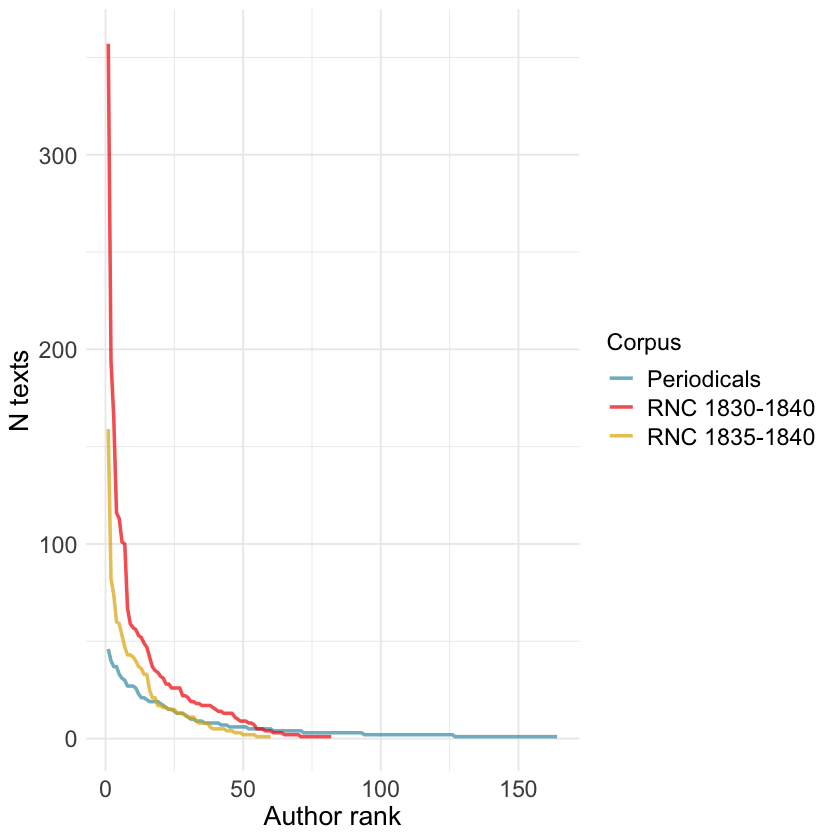

In [36]:
p1 <- rankings_full %>% 
    ggplot(aes(x = rank, y = n, group = group, color = group)) + 
    geom_line(size = 1, alpha = 0.7) + 
    scale_color_manual(values = c(wes_palette("Zissou1")[1], 
                                  wes_palette("Zissou1")[5], 
                                  wes_palette("Zissou1")[4])) +
    theme(axis.text = element_text(size = 14), 
          axis.title = element_text(size = 16),
          legend.text = element_text(size = 14), 
          legend.title = element_text(size = 14)) 

p1 + labs(x = "Author rank", 
         y = "N texts", 
         color = "Corpus")

In [ ]:
# annotation with annotate()
#p1 + labs(x = "Author rank", 
#         y = "N texts", 
#         color = "Corpus") + 
#    # add custom points & lables
#    geom_point(aes(x = 2, y = 194), size = 2) + 
#    annotate("segment", x = 12, y = 214, xend = 4, yend = 197, 
#              arrow = arrow(type = "closed", length = unit(0.02, "npc"))) + 
#    annotate("text", x = 20, y = 216, label = "Pushkin", size = 14/.pt)

top3 <- rankings_nkrja %>% filter(group == "RNC 1830-1840") %>% head(5)
top3
p1 + geom_label_repel(data = top3, aes(x = rank, y = n, label = author), 
                      point.padding = 0.5, 
                     nudge_x = 40, nudge_y = -10, 
                     arrow = arrow(length = unit(0.015, 'npc'))) + 
    geom_point(data = top3) + 
    labs(x = "Author rank", 
         y = "N texts", 
         color = "Corpus")

In [43]:
ggsave(file = "plots/00_author_rankings.png", plot = last_plot(), 
      dpi = 300, height = 7, width = 10, bg = "white")

#### Same distribution check but with number of words by author

In [83]:
# function to count number of tokens by each author in a corpus
count_tokens <- function(corpus) {
    tokens <- corpus %>% 
        unnest_tokens(input = text_raw, output = word, token = "words") %>% 
        filter(author != "NA") %>%
        group_by(author) %>% 
        count(sort = T) %>% 
        ungroup() %>% 
        mutate(rank = row_number())
    }

In [85]:
t30 <- count_tokens(nkrja_1830) %>% mutate(group = "RNC 1830-1840")
head(t30)

t35 <- count_tokens(nkrja_1835) %>% mutate(group = "RNC 1835-1840")
t_per <- count_tokens(per) %>% mutate(group = "Periodicals")

rankings_tokens <- rbind(t30, t35, t_per)

author,n,rank,group
<chr>,<int>,<int>,<chr>
М. Ю. Лермонтов,103065,1,RNC 1830-1840
В. А. Жуковский,55831,2,RNC 1830-1840
И. П. Мятлев,48800,3,RNC 1830-1840
А. С. Пушкин,47553,4,RNC 1830-1840
А. И. Полежаев,30887,5,RNC 1830-1840
В. Г. Бенедиктов,26643,6,RNC 1830-1840


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <9c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <ae>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <9b>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <92>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <98>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b6>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <9c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <ae>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <9b>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <96>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <83>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning me

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <98>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <9c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <9c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <8f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <8f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <90>”
Warning message 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'М. Ю. Лермонтов' w 'mbcsToSbcs': kropka zastąpion

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В. А. Жуковский' w 'mbcsToSbcs': kropka zastąpiona <92>”
Warn

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'И. П. Мятлев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. С. Пушкин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.C

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <b6>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'А. И. Полежаев' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message 

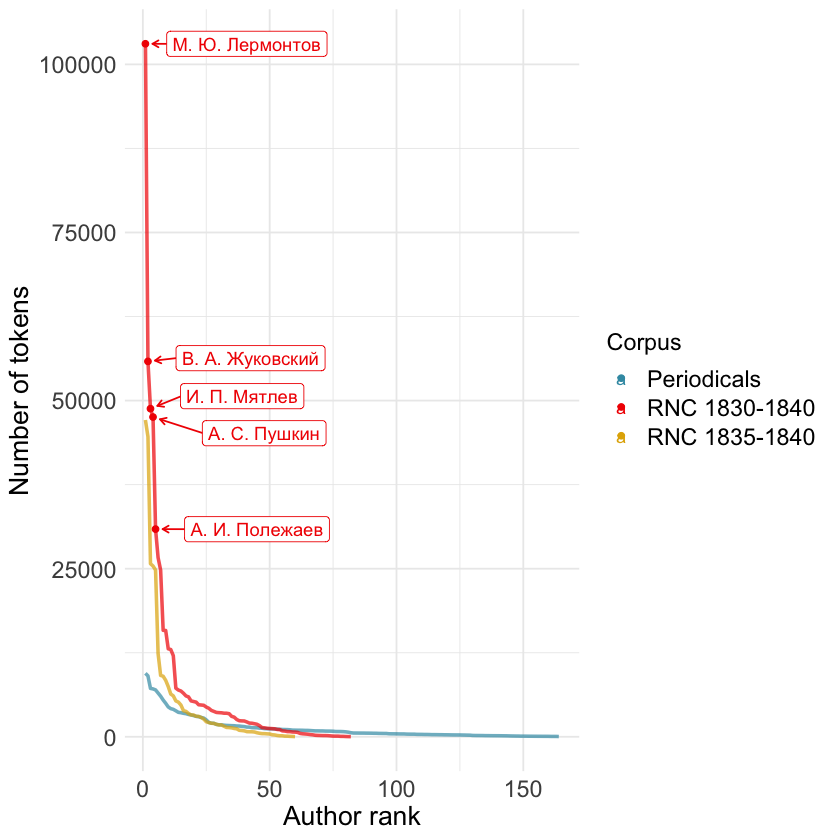

In [88]:
top5 <- ranking_tokens %>% filter(group == "RNC 1830-1840") %>% head(5) 

p2 <- rankings_tokens %>% 
    ggplot(aes(x = rank, y = n, group = group, color = group)) + 
    geom_line(size = 1, alpha = 0.7) + 
    scale_color_manual(values = c(wes_palette("Zissou1")[1], 
                                  wes_palette("Zissou1")[5], 
                                  wes_palette("Zissou1")[4])) +
    theme(axis.text = element_text(size = 14), 
          axis.title = element_text(size = 16),
          legend.text = element_text(size = 14), 
          legend.title = element_text(size = 14)) 

p2 + geom_label_repel(data = top5, aes(x = rank, y = n, label = author), 
                      point.padding = 0.5, 
                     nudge_x = 40, nudge_y = -10, 
                     arrow = arrow(length = unit(0.015, 'npc'))) + 
    geom_point(data = top5) + 
    labs(x = "Author rank", 
         y = "Number of tokens", 
         color = "Corpus")

In [87]:
head(t_per)

author,n,rank,group
<chr>,<int>,<int>,<chr>
Ростопчина Е.П.,9443,1,Periodicals
Тимофеев А.В.,9058,2,Periodicals
Бенедиктов В.Г.,7198,3,Periodicals
Пушкин А.С.,7120,4,Periodicals
Козлов И.И.,6974,5,Periodicals
Бернет Е.,6507,6,Periodicals


In [89]:
ggsave(file = "plots/00_author_rankings_tokens.png", plot = last_plot(), 
      dpi = 300, height = 7, width = 10, bg = "white")

In [93]:
sum(t_per$n)
sum(t30$n)

[1] 209031

[1] 560925

In [31]:
n_unique_author_per <- per %>% 
    select(author) %>% 
    filter(author != "NA") %>% 
    unique() %>% 
    nrow()

In [36]:
print("Top 5 authors presents % of texts:")
per %>% 
        filter(author != "NA") %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(per) * 100) %>% 
        head(5) %>% 
        ungroup() %>% 
        summarise(test = sum(perc)) %>% 
        print()

print("Top 30% authors presents % of texts:")
per %>% 
        filter(author != "NA") %>% 
        group_by(author) %>% 
        count(sort = T) %>% 
        mutate(perc = n / nrow(per) * 100) %>% 
        head(round(n_unique_author_per*0.3)) %>% 
        ungroup() %>% 
        summarise(test = sum(perc)) %>% 
        print()

[1] "Top 5 authors presents % of texts:"
# A tibble: 1 × 1
   test
  <dbl>
1  13.8
[1] "Top 30% authors presents % of texts:"
# A tibble: 1 × 1
   test
  <dbl>
1  58.8
